<a href="https://colab.research.google.com/github/srilamaiti/ml_algo_from_scratch/blob/main/linear_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

**There are four assumptions associated with a linear regression model:**

<li>Linearity: The relationship between X and the mean of Y is linear.</li>
<li>Homoscedasticity: The variance of residual is the same for any value of X.</li>
<li>Independence: Observations are independent of each other.</li>
<li>Normality: For any fixed value of X, Y is normally distributed.</li>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(10)
np.random.seed(10)

## **Creating Data**

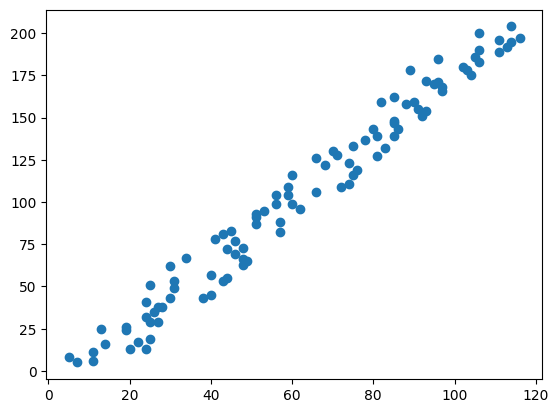

In [126]:
X = np.array([ctr + random.randrange(1, 20) for ctr in np.arange(1, 101, 1)])
y = np.array([(2 * ctr) + random.randrange(1, 5) for ctr in np.arange(1, 101, 1)])
plt.scatter(X, y)
plt.show()

## **Helper Functions**

In [40]:
def loss_function(w, b, x, y):
    numberOf_data_points = len(x)
    '''
    total_error = 0.0
    for i in range(numberOf_data_points):
        total_error += (y[i] - (w * x[i] + b)) ** 2
    return total_error / numberOf_data_points
    '''
    return (y - (w * X + b)) ** 2 / numberOf_data_points

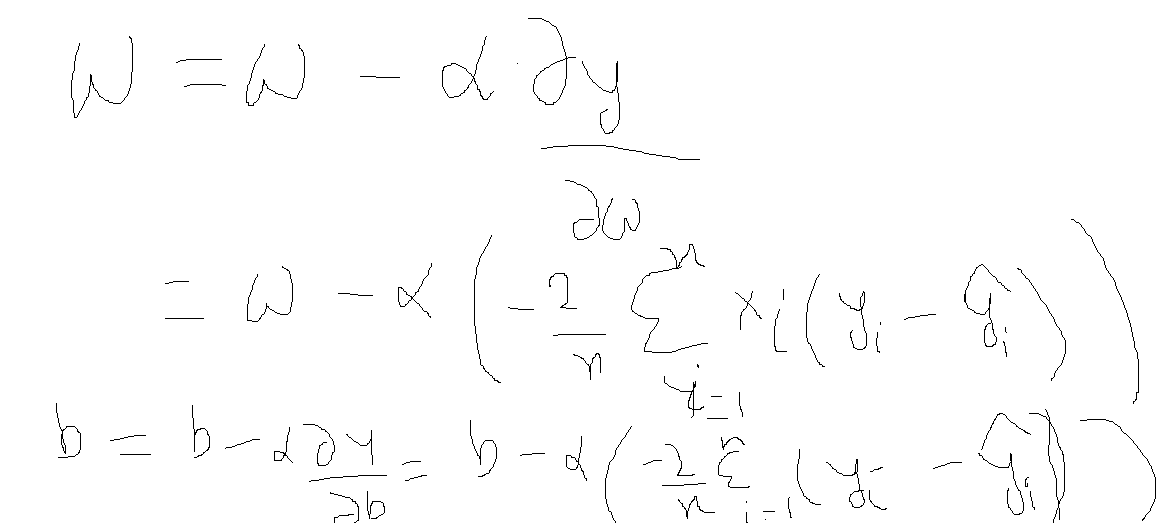

In [155]:
def gradient_descent(curr_w, curr_b, X, y, alpha):
    numberOf_data_points = len(X)
    w_val = (-2 / numberOf_data_points) * np.sum(X * (y - (curr_w * X + curr_b)))
    b_val = (-2 / numberOf_data_points) * np.sum((y - (curr_w * X + curr_b)))
    new_w = curr_w - alpha * w_val
    new_b = curr_b - alpha * b_val
    return (curr_w - alpha * w_val), (curr_b - alpha * b_val)

## **Initialization**

In [156]:
w = 0
b = 0
alpha = 0.000001
epochs = 1000

## **Prediction**

In [157]:
for i in range(epochs):
    w, b = gradient_descent(w, b, X, y, alpha)
    #print(w, b)
print(w, b)

1.7139187556228177 0.017549105344849075


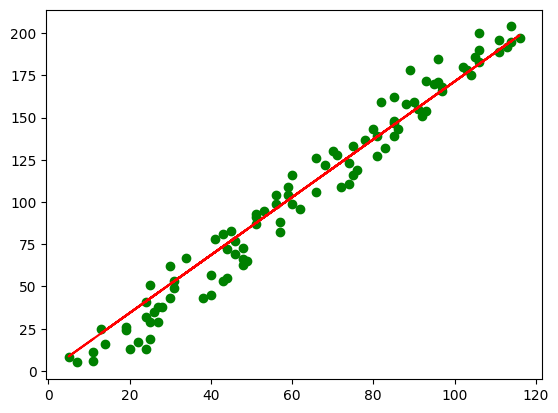

In [158]:
plt.scatter(X, y, color = 'green')
plt.plot(X, w * X + b, color = 'red')
plt.show()

## **Interpretaion of Coefficients**

There are 4 types of linear regression equations and in those cases the coefficients are interpreted differently.

**<li> normal-normal </li>**
Say the coeeficient for independent variable x1 is beta1, this implies that one unit of increase in independent valiable x1 will increase the dependent variable y by beat1 amount when all other independent variable are kept constant.

**<li> log-normal </li>**
Exponentiate the coefficient. This gives the multiplicative factor for every one-unit increase in the independent variable. Example: the coefficient is 0.198. exp(0.198) = 1.218962. For every one-unit increase in the independent variable, our dependent variable increases by a factor of about 1.22, or 22%. Recall that multiplying a number by 1.22 is the same as increasing the number by 22%. Likewise, multiplying a number by, say 0.84, is the same as decreasing the number by 1 – 0.84 = 0.16, or 16%.

**<li> normal-log </li>**
Divide the coefficient by 100. This tells us that a 1% increase in the independent variable increases (or decreases) the dependent variable by (coefficient/100) units. Example: the coefficient is 0.198. 0.198/100 = 0.00198. For every 1% increase in the independent variable, our dependent variable increases by about 0.002. For x percent increase, multiply the coefficient by log(1.x). Example: For every 10% increase in the independent variable, our dependent variable increases by about 0.198 * log(1.10) = 0.02.

**<li> log-log </li>**
Interpret the coefficient as the percent increase in the dependent variable for every 1% increase in the independent variable. Example: the coefficient is 0.198. For every 1% increase in the independent variable, our dependent variable increases by about 0.20%. For x percent increase, calculate 1.x to the power of the coefficient, subtract 1, and multiply by 100. Example: For every 20% increase in the independent variable, our dependent variable increases by about ((1.20 ** 0.198) - 1) * 100 = 3.7 percent.